In [1]:
import numpy as np
import glob
import cv2
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
import statistics as st

In [2]:
# import all image files with the .jpg extension
images = glob.glob ("../Menu/_datasets/*.jpg")

In [3]:
# Load a list of images into image_data variable
image_data = []
for img in images:
    this_image = cv2.imread(img, 1)
    image_data.append(this_image)

In [4]:
img = cv2.cvtColor(image_data[0], cv2.COLOR_BGR2RGB)

In [5]:
image_data[0]

array([[[ 91, 103, 115],
        [ 81,  93, 105],
        [ 62,  74,  84],
        ...,
        [131, 139, 139],
        [ 98, 103, 104],
        [ 70,  75,  76]],

       [[ 89, 101, 113],
        [ 76,  88, 100],
        [ 54,  66,  76],
        ...,
        [142, 150, 150],
        [106, 111, 112],
        [ 79,  84,  85]],

       [[ 82,  94, 106],
        [ 68,  80,  92],
        [ 43,  55,  65],
        ...,
        [148, 155, 158],
        [102, 107, 108],
        [ 71,  76,  77]],

       ...,

       [[ 79,  99, 110],
        [ 77,  97, 108],
        [ 84, 105, 113],
        ...,
        [154, 164, 164],
        [147, 157, 157],
        [142, 155, 153]],

       [[ 82, 104, 115],
        [ 79, 101, 112],
        [ 87, 108, 116],
        ...,
        [155, 165, 165],
        [152, 162, 162],
        [160, 171, 169]],

       [[ 84, 106, 117],
        [ 81, 103, 114],
        [ 87, 108, 116],
        ...,
        [156, 164, 164],
        [138, 148, 148],
        [167, 178, 176]]

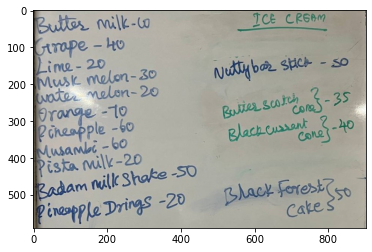

In [6]:
plt.imshow(img, cmap='gray')
plt.show()

# Resize image

In [7]:
for img in image_data:
    print(img.shape)

(590, 902, 3)
(566, 890, 3)
(4097, 7703, 3)
(5642, 7152, 3)


In [8]:
for i in range(len(image_data)):
    image_data[i] = cv2.resize(image_data[i], (850,600))

In [9]:
for img in image_data:
    print(img.shape)

(600, 850, 3)
(600, 850, 3)
(600, 850, 3)
(600, 850, 3)


# Colour Channels

In [10]:
# Extract the pixel values for each channel
red_pixels = img[:,:,0].ravel()
green_pixels = img[:,:,1].ravel()
blue_pixels = img[:,:,2].ravel()

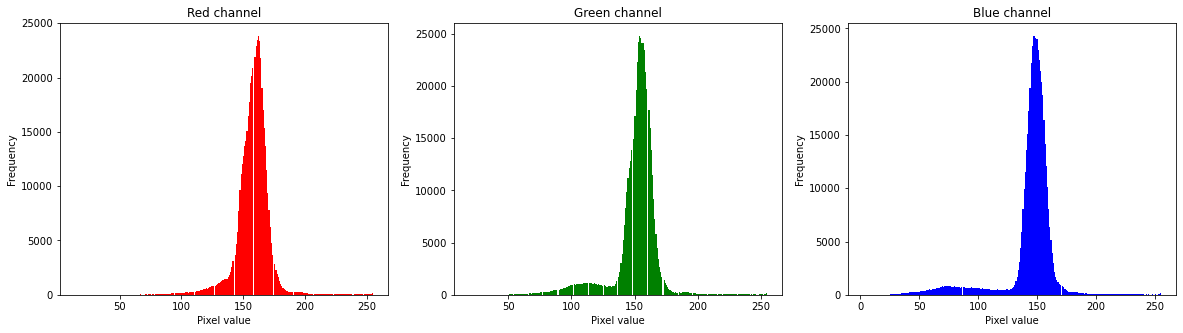

In [11]:
# Plot the histograms
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].hist(red_pixels, bins=256, color='red')
axs[0].set_title('Red channel')
axs[0].set_xlabel('Pixel value')
axs[0].set_ylabel('Frequency')
axs[1].hist(green_pixels, bins=256, color='green')
axs[1].set_title('Green channel')
axs[1].set_xlabel('Pixel value')
axs[1].set_ylabel('Frequency')
axs[2].hist(blue_pixels, bins=256, color='blue')
axs[2].set_title('Blue channel')
axs[2].set_xlabel('Pixel value')
axs[2].set_ylabel('Frequency')
plt.show()

# Black and white, GrayScale

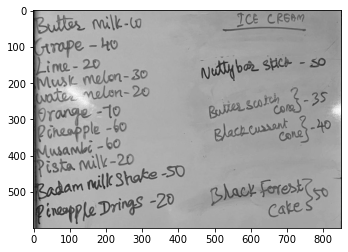

In [12]:
plt.imshow(cv2.cvtColor(image_data[0], cv2.COLOR_BGR2GRAY), cmap='gray')
plt.show()

# Edge Detect

In [13]:
def edgeDetect(ipImg):
    thresh, image_black = cv2.threshold(cv2.cvtColor(ipImg, cv2.COLOR_BGR2RGB), 120, 200, cv2.THRESH_BINARY)
    blur = cv2.GaussianBlur(image_black, (5, 5), 0)
    canny = cv2.Canny(blur, threshold1=50, threshold2=200)
    return canny

In [14]:
imgEdgeData = []
for i in image_data:
    imgEdgeData.append(edgeDetect(i))

In [15]:
for i in imgEdgeData:
    print(i.shape)

(600, 850)
(600, 850)
(600, 850)
(600, 850)


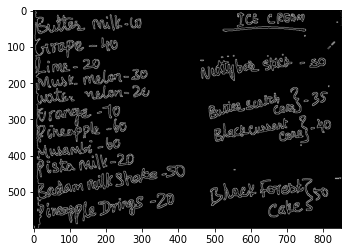

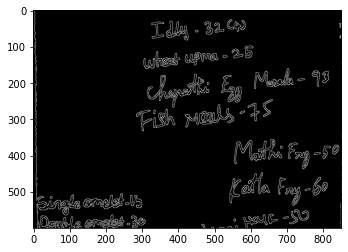

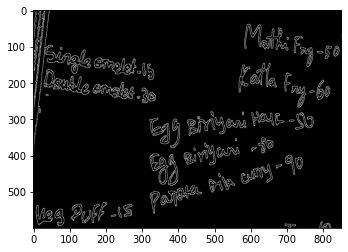

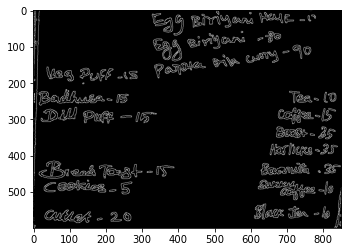

In [16]:
for i in imgEdgeData:
    plt.imshow(i, cmap='gray')
    plt.show()

In [18]:
for i in range(4):
    cv2.imwrite(f'4_edge{i}.png', imgEdgeData[i])